In [ ]:
pip install geopandas matplotlib
pip install folium
pip install wordcloud nltk pandas
pip install ipyleaflet ipywidgets pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from folium.plugins import HeatMap
import folium
from ipyleaflet import Map, Heatmap, WidgetControl
from ipywidgets import IntSlider, jslink, VBox
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

In [3]:

file_path = 'D:/NASA TOPS/haunted_places.csv'
haunted_places = pd.read_csv(file_path)

haunted_places.head(100)

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
...,...,...,...,...,...,...,...,...,...,...
95,Dearborn,United States,The cleaners have claimed at nighttime to have...,Tournament Players Club,Michigan,MI,-83.200852,42.306436,-83.176314,42.322260
96,Dearborn Heights,United States,"About 33 years ago, at a old school called Ber...",Berwyn Senior Center,Michigan,MI,-83.297266,42.336766,-83.273263,42.336982
97,Dearborn Heights,United States,Computer number 25 is definitely haunted by an...,Crestwood Computer Lab,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982
98,Dearborn Heights,United States,People have reported sightings of ghosts walki...,Crestwood High School,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982


In [4]:
missing_values = haunted_places.isnull().sum()

print("Missing values in each column:")
print(missing_values)

haunted_places.head(100)

Missing values in each column:
city                 3
country              0
description          0
location             3
state                0
state_abbrev         0
longitude         1261
latitude          1261
city_longitude      29
city_latitude       29
dtype: int64


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
...,...,...,...,...,...,...,...,...,...,...
95,Dearborn,United States,The cleaners have claimed at nighttime to have...,Tournament Players Club,Michigan,MI,-83.200852,42.306436,-83.176314,42.322260
96,Dearborn Heights,United States,"About 33 years ago, at a old school called Ber...",Berwyn Senior Center,Michigan,MI,-83.297266,42.336766,-83.273263,42.336982
97,Dearborn Heights,United States,Computer number 25 is definitely haunted by an...,Crestwood Computer Lab,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982
98,Dearborn Heights,United States,People have reported sightings of ghosts walki...,Crestwood High School,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982


In [5]:
haunted_places['city'].fillna('Unknown_city', inplace=True)

haunted_places['location'].fillna('unknown_location', inplace=True)
haunted_places.tail(100)

C:\Users\sathv\AppData\Local\Temp\ipykernel_17804\265543370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  haunted_places['city'].fillna('Unknown_city', inplace=True)
C:\Users\sathv\AppData\Local\Temp\ipykernel_17804\265543370.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
10892,Denver,United States,Reports of an apparition of a monk walking on ...,Monk monastery on hill,Colorado,CO,-104.993138,39.741540,-104.990251,39.739236
10893,Denver,United States,Lumber Baron Inn - June 2005 Correction: previ...,North Denver,Colorado,CO,-104.960279,39.764231,-104.990251,39.739236
10894,Denver,United States,Many security guards see a woman in a long dre...,State Capitol Buildings,Colorado,CO,-104.984807,39.739325,-104.990251,39.739236
10895,Denver,United States,Houses the student union for the Auraria Campu...,Tivoli Student Union,Colorado,CO,-105.005976,39.745077,-104.990251,39.739236
10896,Denver,United States,"The building has been renovated, and some of t...",Tramway building,Colorado,CO,-104.968000,39.766453,-104.990251,39.739236
...,...,...,...,...,...,...,...,...,...,...
10987,Westminster,United States,at 12 midnight you can see a lady with two lit...,city hall,Colorado,CO,-105.048936,39.862610,-105.037205,39.836653
10988,Westminster,United States,Is haunted by the victims of a murder that hap...,Pillar of Fire,Colorado,CO,-105.032091,39.847237,-105.037205,39.836653
10989,Wheat Ridge,United States,The institution was for kids 18 years old and ...,Ridge Mental Institution,Colorado,CO,-105.063974,39.769726,-105.077206,39.766098
10990,Wheat Ridge,United States,Gymnasium - their have been reports of a litt...,Wheat Ridge Middle School,Colorado,CO,-105.103613,39.764055,-105.077206,39.766098


In [6]:
missing_values = haunted_places.isnull().sum()

print("Missing values in each column:")
print(missing_values)

haunted_places.head(100)

Missing values in each column:
city                 0
country              0
description          0
location             0
state                0
state_abbrev         0
longitude         1261
latitude          1261
city_longitude      29
city_latitude       29
dtype: int64


,city,country,description,location,state,state_abbrev,longitude,latitude,city_longitude,city_latitude
0,Ada,United States,Ada witch - Sometimes you can see a misty blue...,Ada Cemetery,Michigan,MI,-85.504893,42.962106,-85.495480,42.960727
1,Addison,United States,A little girl was killed suddenly while waitin...,North Adams Rd.,Michigan,MI,-84.381843,41.971425,-84.347168,41.986434
2,Adrian,United States,If you take Gorman Rd. west towards Sand Creek...,Ghost Trestle,Michigan,MI,-84.035656,41.904538,-84.037166,41.897547
3,Adrian,United States,"In the 1970's, one room, room 211, in the old ...",Siena Heights University,Michigan,MI,-84.017565,41.905712,-84.037166,41.897547
4,Albion,United States,Kappa Delta Sorority - The Kappa Delta Sororit...,Albion College,Michigan,MI,-84.745177,42.244006,-84.753030,42.243097
...,...,...,...,...,...,...,...,...,...,...
95,Dearborn,United States,The cleaners have claimed at nighttime to have...,Tournament Players Club,Michigan,MI,-83.200852,42.306436,-83.176314,42.322260
96,Dearborn Heights,United States,"About 33 years ago, at a old school called Ber...",Berwyn Senior Center,Michigan,MI,-83.297266,42.336766,-83.273263,42.336982
97,Dearborn Heights,United States,Computer number 25 is definitely haunted by an...,Crestwood Computer Lab,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982
98,Dearborn Heights,United States,People have reported sightings of ghosts walki...,Crestwood High School,Michigan,MI,-83.293241,42.322092,-83.273263,42.336982


In [7]:
missing_long_lat = haunted_places[
    haunted_places[['longitude', 'latitude', 'city_longitude', 'city_latitude']].isnull().any(axis=1)
]

print("Rows with Missing Longitude and Latitude:")
print(missing_long_lat)

#missing values in each column
missing_values = haunted_places.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Rows with Missing Longitude and Latitude:
                    city        country  \
6        Algoma Township  United States   
15             Assininns  United States   
17               Augusta  United States   
49                Burton  United States   
50                 Byron  United States   
...                  ...            ...   
10973     Poncha Springs  United States   
10977             Pueblo  United States   
10979      Pueblo County  United States   
10981  South of Sterling  United States   
10982           Sterling  United States   

                                             description  \
6      On a winding dirt road next to the Rogue River...   
15     Before the building was turned into a Tribal C...   
17     Hotel now owned by Michigan State University. ...   
49     ticking clocks that are not there. Things will...   
50     There was a man named Nick Bradon that lived a...   
...                                                  ...   
10973  On a small tra

In [8]:
unique_values_city = haunted_places['city'].unique()
unique_values_country = haunted_places['country'].unique()
unique_values_location = haunted_places['location'].unique()
unique_values_state = haunted_places['state'].unique()

unique_count_city = haunted_places['city'].nunique()
unique_count_country = haunted_places['country'].nunique()
unique_count_location = haunted_places['location'].nunique()
unique_count_state = haunted_places['state'].nunique()

print(f"Unique values in 'city' column ({unique_count_city} unique values):")
print(unique_values_city)
print("\n")

print(f"Unique values in 'country' column ({unique_count_country} unique values):")
print(unique_values_country)
print("\n")

print(f"Unique values in 'location' column ({unique_count_location} unique values):")
print(unique_values_location)
print("\n")

print(f"Unique values in 'state' column ({unique_count_state} unique values):")
print(unique_values_state)
print("\n")

Unique values in 'city' column (4386 unique values):
['Ada' 'Addison' 'Adrian' ... 'Walsenburg' 'Wheat Ridge' 'Woodland Park']


Unique values in 'country' column (1 unique values):
['United States']


Unique values in 'location' column (9904 unique values):
['Ada Cemetery' 'North Adams Rd.' 'Ghost Trestle' ...
 'Ridge Mental Institution' 'Wheat Ridge Middle School'
 'Saylor Park Forest']


Unique values in 'state' column (51 unique values):
['Michigan' 'Pennsylvania' 'California' 'Massachusetts' 'Arkansas'
 'Oregon' 'Arizona' 'Maryland' 'Oklahoma' 'Maine' 'Alaska' 'Louisiana'
 'Alabama' 'Ohio' 'New Jersey' 'Washington DC' 'North Dakota' 'Wyoming'
 'North Carolina' 'Kentucky' 'Kansas' 'New York' 'Wisconsin' 'Iowa'
 'West Virginia' 'New Mexico' 'Washington' 'Illinois' 'Indiana' 'Virginia'
 'Idaho' 'New Hampshire' 'Vermont' 'Nevada' 'Hawaii' 'Utah' 'Nebraska'
 'Georgia' 'Texas' 'Montana' 'Tennessee' 'Florida' 'Missouri' 'Delaware'
 'South Dakota' 'Mississippi' 'Connecticut' 'Minnesota' '

In [9]:
haunted_places['Extra'] = 1
print(haunted_places.head())

      city        country                                        description  \
0      Ada  United States  Ada witch - Sometimes you can see a misty blue...   
1  Addison  United States  A little girl was killed suddenly while waitin...   
2   Adrian  United States  If you take Gorman Rd. west towards Sand Creek...   
3   Adrian  United States  In the 1970's, one room, room 211, in the old ...   
4   Albion  United States  Kappa Delta Sorority - The Kappa Delta Sororit...   

                   location     state state_abbrev  longitude   latitude  \
0              Ada Cemetery  Michigan           MI -85.504893  42.962106   
1           North Adams Rd.  Michigan           MI -84.381843  41.971425   
2             Ghost Trestle  Michigan           MI -84.035656  41.904538   
3  Siena Heights University  Michigan           MI -84.017565  41.905712   
4            Albion College  Michigan           MI -84.745177  42.244006   

   city_longitude  city_latitude  Extra  
0      -85.495480   

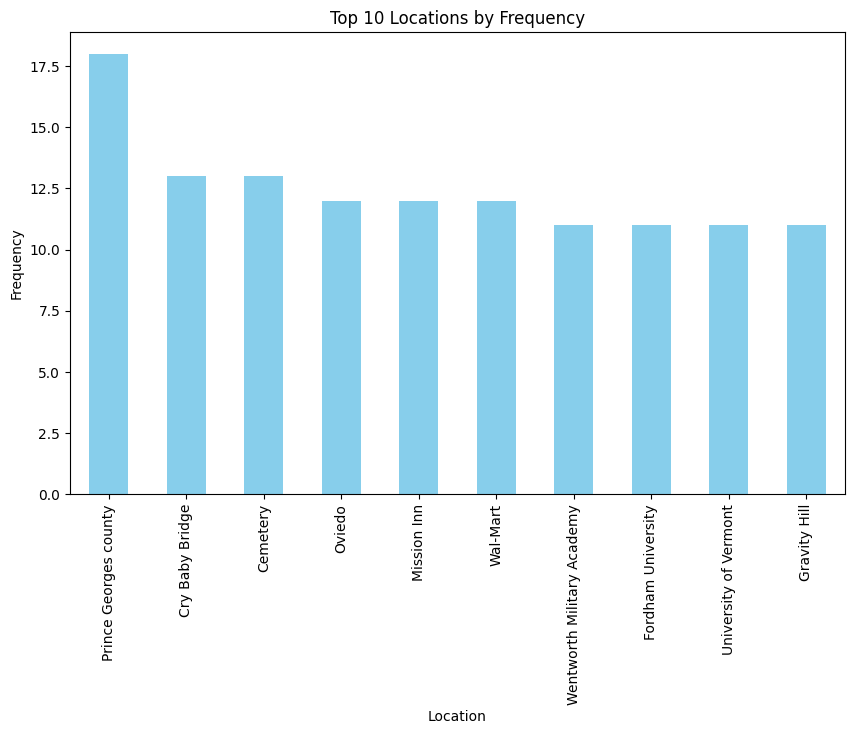

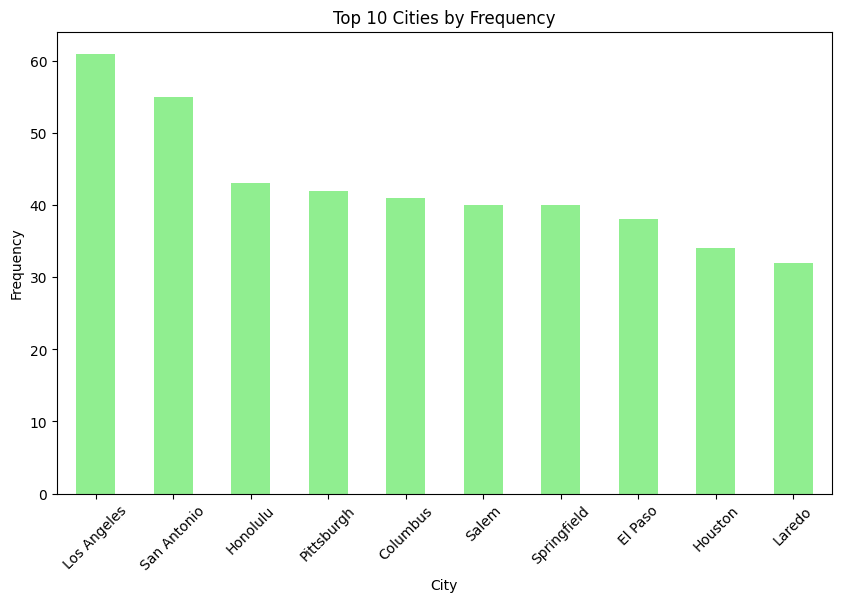

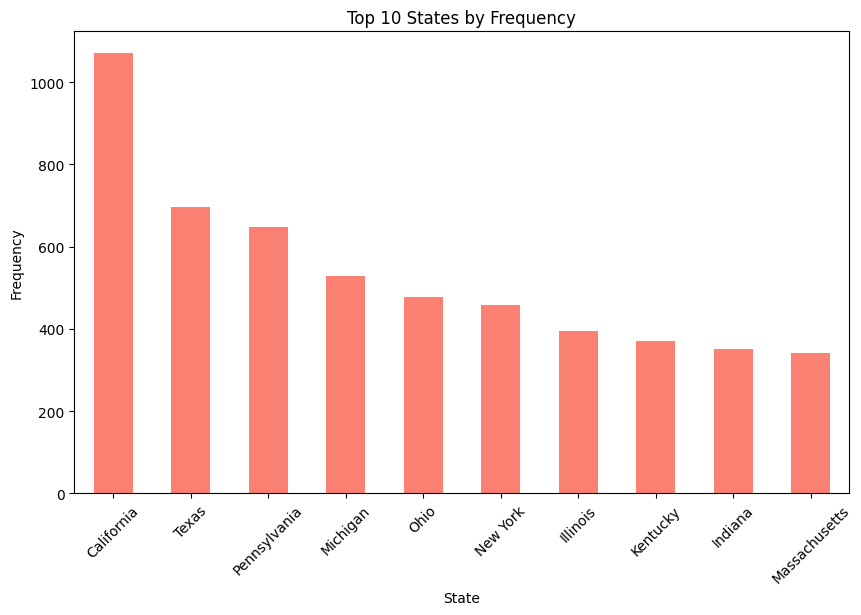

In [10]:
#distribution of locations
plt.figure(figsize=(10, 6))
location_counts = haunted_places['location'].value_counts().head(10)
location_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations by Frequency')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#distribution of cities
plt.figure(figsize=(10, 6))
city_counts = haunted_places['city'].value_counts().head(10)
city_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#distribution of states
plt.figure(figsize=(10, 6))
state_counts = haunted_places['state'].value_counts().head(10)
state_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 States by Frequency')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [11]:
#Statistics for categorical columns
print("Summary Statistics for Categorical Columns:")
print(haunted_places[['city', 'location', 'state', 'country']].describe(include='all'))

# Top Categories
top_cities = haunted_places['city'].value_counts().head(10)
top_locations = haunted_places['location'].value_counts().head(10)
top_states = haunted_places['state'].value_counts().head(10)

print("\nTop 10 Cities:")
print(top_cities)

print("\nTop 10 Locations:")
print(top_locations)

print("\nTop 10 States:")
print(top_states)


Summary Statistics for Categorical Columns:
               city               location       state        country
count         10992                  10992       10992          10992
unique         4386                   9904          51              1
top     Los Angeles  Prince Georges county  California  United States
freq             61                     18        1070          10992

Top 10 Cities:
city
Los Angeles    61
San Antonio    55
Honolulu       43
Pittsburgh     42
Columbus       41
Salem          40
Springfield    40
El Paso        38
Houston        34
Laredo         32
Name: count, dtype: int64

Top 10 Locations:
location
Prince Georges county         18
Cry Baby Bridge               13
Cemetery                      13
Oviedo                        12
Mission Inn                   12
Wal-Mart                      12
Wentworth Military Academy    11
Fordham University            11
University of Vermont         11
Gravity Hill                  11
Name: count, dtype: i

In [12]:
# Drop rows with missing longitude or latitude values
haunted_places = haunted_places.dropna(subset=['city_longitude', 'city_latitude'])

#centered around the mean latitude and longitude
m = folium.Map(location=[haunted_places['city_latitude'].mean(), haunted_places['city_longitude'].mean()], zoom_start=4)

heat_data = [[row['city_latitude'], row['city_longitude']] for index, row in haunted_places.iterrows()]
HeatMap(heat_data, radius=5, blur=2, max_zoom=1).add_to(m)
m

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


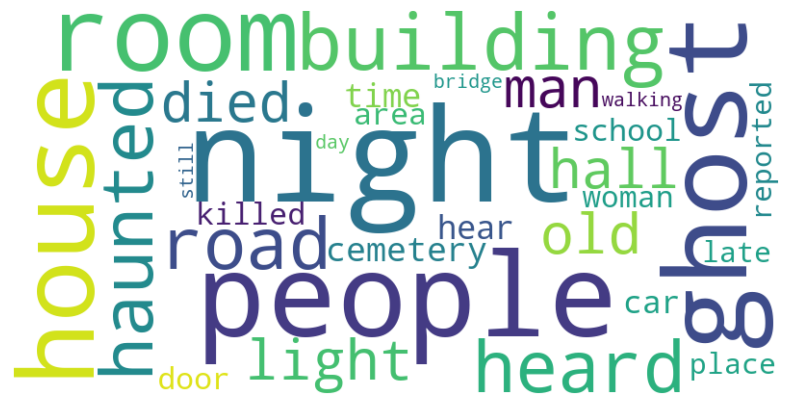

In [13]:
#stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#descriptions as a single string
text = " ".join(description for description in haunted_places.description.dropna())

# stop word
additional_stopwords = {"the", "a", "one", "also", "would", "could", "said", "see", "get", "sometime", "say", "seen", "many", "reports", "around", "used", "go", "back"}
stop_words = stop_words.union(additional_stopwords)

#cloud
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400, max_words =30).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


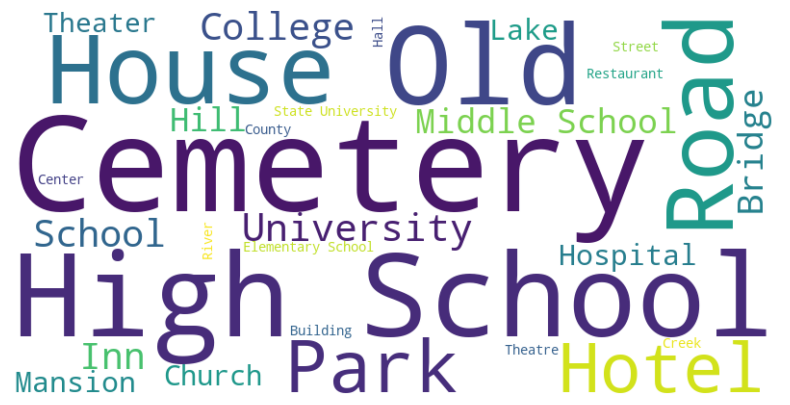

In [14]:
#stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

#descriptions as a single string
text = " ".join(location for location in haunted_places.location.dropna())

# stop word
additional_stopwords = {"the", "a", "one", "also", "would", "could", "said", "see", "get", "sometime", "say", "seen", "St", "Rd"}
stop_words = stop_words.union(additional_stopwords)

#cloud
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400, max_words=30).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


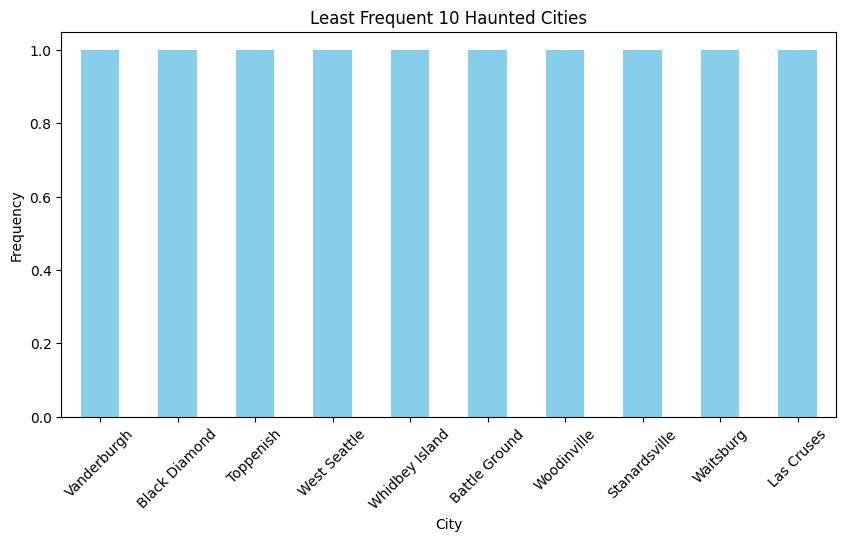

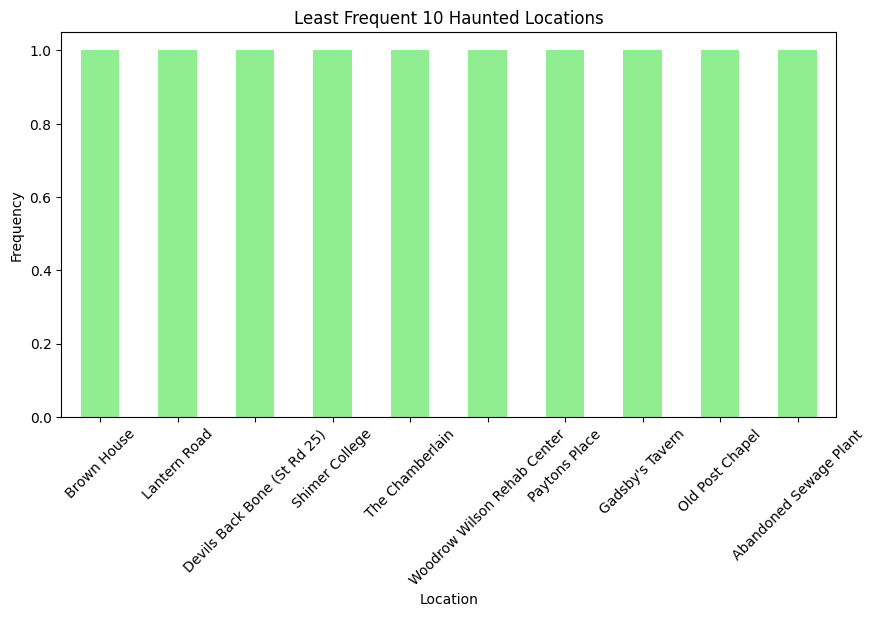

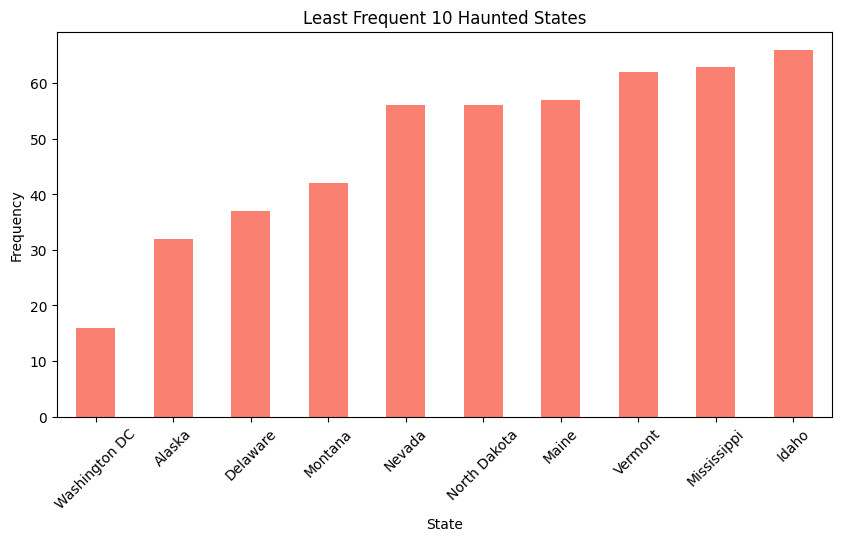

In [15]:
least_frequent_cities = haunted_places['city'].value_counts().nsmallest(10)
plt.figure(figsize=(10, 5))
least_frequent_cities.plot(kind='bar', color='skyblue')
plt.title('Least Frequent 10 Haunted Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

least_frequent_locations = haunted_places['location'].value_counts().nsmallest(10)
plt.figure(figsize=(10, 5))
least_frequent_locations.plot(kind='bar', color='lightgreen')
plt.title('Least Frequent 10 Haunted Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

least_frequent_states = haunted_places['state'].value_counts().nsmallest(10)
plt.figure(figsize=(10, 5))
least_frequent_states.plot(kind='bar', color='salmon')
plt.title('Least Frequent 10 Haunted States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [16]:
#count school or schools
location_series = haunted_places['location'].dropna().str.lower()
school_count = location_series.str.contains(r'\bschool\b|\bschools\b').sum()

print(school_count)


1206


In [17]:
#count school orschools
location_series = haunted_places['location'].dropna().str.lower()
high_school_count = location_series.str.contains(r'\bhigh school\b').sum()

print(high_school_count)

641


In [18]:
#count school Cemetery
location_series = haunted_places['location'].dropna().str.lower()
cemetery = location_series.str.contains(r'\bcemetery\b').sum()

print(cemetery)

748


In [19]:
#count school house
location_series = haunted_places['location'].dropna().str.lower()
house = location_series.str.contains(r'\bhouse\b').sum()

print(house)

498


In [20]:
#count school houses
location_series = haunted_places['location'].dropna().str.lower()
houses = location_series.str.contains(r'\bhouses\b').sum()

print(houses)

6


In [21]:
#count school school
location_series = haunted_places['location'].dropna().str.lower()
school = location_series.str.contains(r'\bschool\b').sum()

print(school)

1198


In [22]:
#count school schools
location_series = haunted_places['location'].dropna().str.lower()
schools = location_series.str.contains(r'\bschools\b').sum()

print(schools)

8


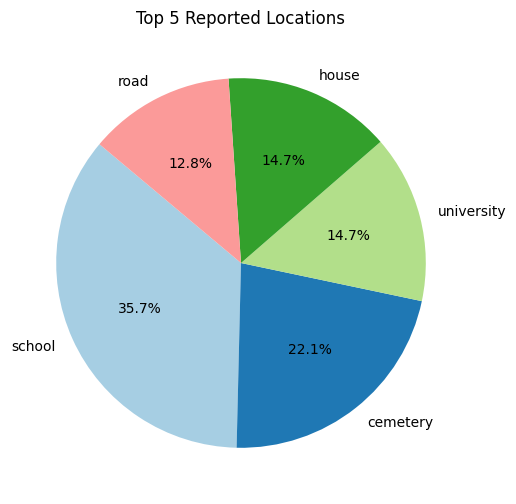

In [23]:
#stop words
additional_stopwords = {"haunted", "place", "one", "also", "would", "could", "said", "high", "old"}
stop_words = stop_words.union(additional_stopwords)

#single string
text = " ".join(location for location in haunted_places['location'].dropna())

#lowercase
words = re.findall(r'\b\w+\b', text.lower())

filtered_words = [word for word in words if word not in stop_words]

# Count
word_counts = Counter(filtered_words)

#top 5 most common words
top_words = word_counts.most_common(5)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.pie(counts, labels=words, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 Reported Locations')
plt.show()